In [1]:
from pet_mad.calculator import PETMADCalculator
import ase
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from metatomic.torch import AtomisticModel, ModelMetadata

In [10]:
import torch

In [18]:
checkpoint = torch.load('../huggingface/pet-mad/models/pet-mad-latest.ckpt', weights_only=False, map_location='cpu')

In [ ]:
checkpoint['metadata'] = ModelMetadata(
        name="PET-MAD",
        description="A universal interatomic potential for advanced materials modeling",
        authors=[
            "Arslan Mazitov (arslan.mazitov@epfl.ch)",
            "Filippo Bigi",
            "Matthias Kellner",
            "Paolo Pegolo",
            "Davide Tisi",
            "Guillaume Fraux",
            "Sergey Pozdnyakov",
            "Philip Loche",
            "Michele Ceriotti (michele.ceriotti@epfl.ch)",
        ],
        references={
            "architecture": [
                "https://arxiv.org/abs/2305.19302v3",
                "LLPR (uncertainty method): https://iopscience.iop.org/article/10.1088/2632-2153/ad805f",  # noqa: E501
                "LPR (if using per-atom uncertainty): https://pubs.acs.org/doi/10.1021/acs.jctc.3c00704",  # noqa: E501
                ],
            "model": ["http://arxiv.org/abs/2503.14118"],
        },
    )

In [17]:
torch.save(checkpoint, '../huggingface/pet-mad/models/pet-mad-latest.ckpt')

In [3]:
METADATA = ModelMetadata(
    name="PET-MAD",
    
    description="A universal interatomic potential for advanced materials modeling",
    authors=[
        "Arslan Mazitov (arslan.mazitov@epfl.ch)",
        "Filippo Bigi",
        "Matthias Kellner",
        "Paolo Pegolo",
        "Davide Tisi",
        "Guillaume Fraux",
        "Sergey Pozdnyakov",
        "Philip Loche",
        "Michele Ceriotti (michele.ceriotti@epfl.ch)",
    ],
    references={
        "architecture": ["https://arxiv.org/abs/2305.19302v3"],
        "model": ["http://arxiv.org/abs/2503.14118"],
    },
)

In [8]:
from copy import deepcopy

In [9]:
deepcopy(METADATA)

This is the PET-MAD model

A universal interatomic potential for advanced materials modeling

Model authors
-------------

- Arslan Mazitov (arslan.mazitov@epfl.ch)
- Filippo Bigi
- Matthias Kellner
- Paolo Pegolo
- Davide Tisi
- Guillaume Fraux
- Sergey Pozdnyakov
- Philip Loche
- Michele Ceriotti (michele.ceriotti@epfl.ch)

Model references
----------------

Please cite the following references when using this model:
- about this specific model:
  * http://arxiv.org/abs/2503.14118
- about the architecture of this model:
  * https://arxiv.org/abs/2305.19302v3

In [80]:
calc_llpr = PETMADCalculator(checkpoint_path='/Users/arslanmazitov/projects/huggingface/pet-mad/models/pet-mad-latest.ckpt', calculate_uncertainty=True, calculate_ensemble=True)

In [85]:
calc_llpr._model.metadata().name

''

In [61]:
from metatomic.torch import AtomisticModel, ModelMetadata

In [62]:
METADATA = ModelMetadata(
    name="PET-MAD",
    
    description="A universal interatomic potential for advanced materials modeling",
    authors=[
        "Arslan Mazitov (arslan.mazitov@epfl.ch)",
        "Filippo Bigi",
        "Matthias Kellner",
        "Paolo Pegolo",
        "Davide Tisi",
        "Guillaume Fraux",
        "Sergey Pozdnyakov",
        "Philip Loche",
        "Michele Ceriotti (michele.ceriotti@epfl.ch)",
    ],
    references={
        "architecture": ["https://arxiv.org/abs/2305.19302v3"],
        "model": ["http://arxiv.org/abs/2503.14118"],
    },
)

In [43]:
dimers = read("/Users/arslanmazitov/Downloads/dimers.xyz", index=":")

dimer_curves = {}
for dimer in dimers:
    element = dimer.symbols[0]
    if element not in dimer_curves:
        dimer_curves[element] = []
    distance = dimer.info['distance']
    energy = dimer.get_potential_energy()
    calc_llpr.reset()
    dimer.calc = calc_llpr
    pet_mad_energy = dimer.get_potential_energy()
    energy_uncertainty = dimer.calc.get_energy_uncertainty()
    dimer_curves[element].append([distance, energy, pet_mad_energy, energy_uncertainty])

In [56]:
energy_uncertainty

array(0.39571226, dtype=float32)

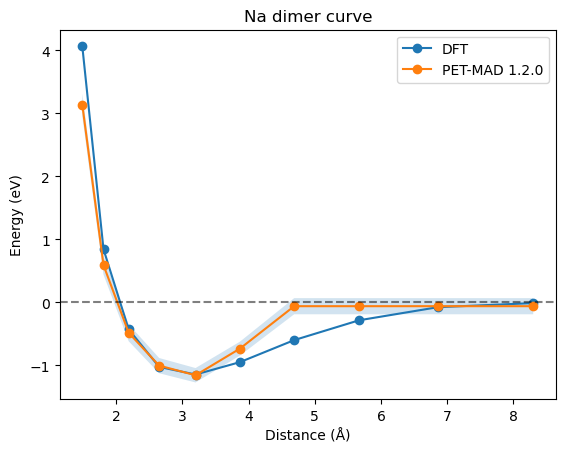

In [60]:
element = 'Na'
dc = np.array(sorted(dimer_curves[element], key=lambda x: x[0]))

plt.plot(dc[:, 0], dc[:, 1], 'o-', label='DFT')
plt.plot(dc[:, 0], dc[:, 2], 'o-', label='PET-MAD 1.2.0')
plt.fill_between(dc[:, 0], dc[:, 2] - dc[:, 3], dc[:, 2] + dc[:, 3], alpha=0.2)
plt.axhline(y=0.0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Distance (Å)')
plt.ylabel('Energy (eV)')
plt.title(f'{element} dimer curve')
plt.legend()
plt.show()

In [72]:
from packaging.version import Version, InvalidVersion

In [75]:
a = Version('1.2.0-rc2')
b = Version('1.1.9-rc1')

a > b

True

In [77]:
v = Version('1.0.0') 

In [79]:
AVAILABLE_VERSIONS = [Version(v) for v in ("1.2.0rc1", "1.1.0", "1.0.1", "1.0.0")]

In [78]:
print(v)

1.0.0


In [71]:
a > b

True